# Potato Disease Project 

## Import Liraries

In [20]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np

## Define all the Constants

In [21]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=40

## Preprocesse Data by tensorflow dataset object

In [22]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "G:\Potata Disease_project\PlantVillage",
    shuffle= True,
    batch_size= BATCH_SIZE,
    seed=123,
    image_size= (IMAGE_SIZE,IMAGE_SIZE)
)

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\karim\AppData\Local\Temp\ipykernel_14296\3587684657.py:2: SyntaxWarning: invalid escape sequence '\P'
  "G:\Potata Disease_project\PlantVillage",


Found 4500 files belonging to 3 classes.


In [23]:
Class_names = dataset.class_names
Class_names

['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']

In [24]:
for image_batch , image_batch in dataset.take(1):
    print (image_batch.shape)
    print (image_batch.numpy())

(32,)
[1 1 2 2 2 0 2 1 2 2 2 2 1 1 2 1 1 1 0 1 1 0 0 1 0 1 1 2 0 1 1 1]


## Visualize some of the images  

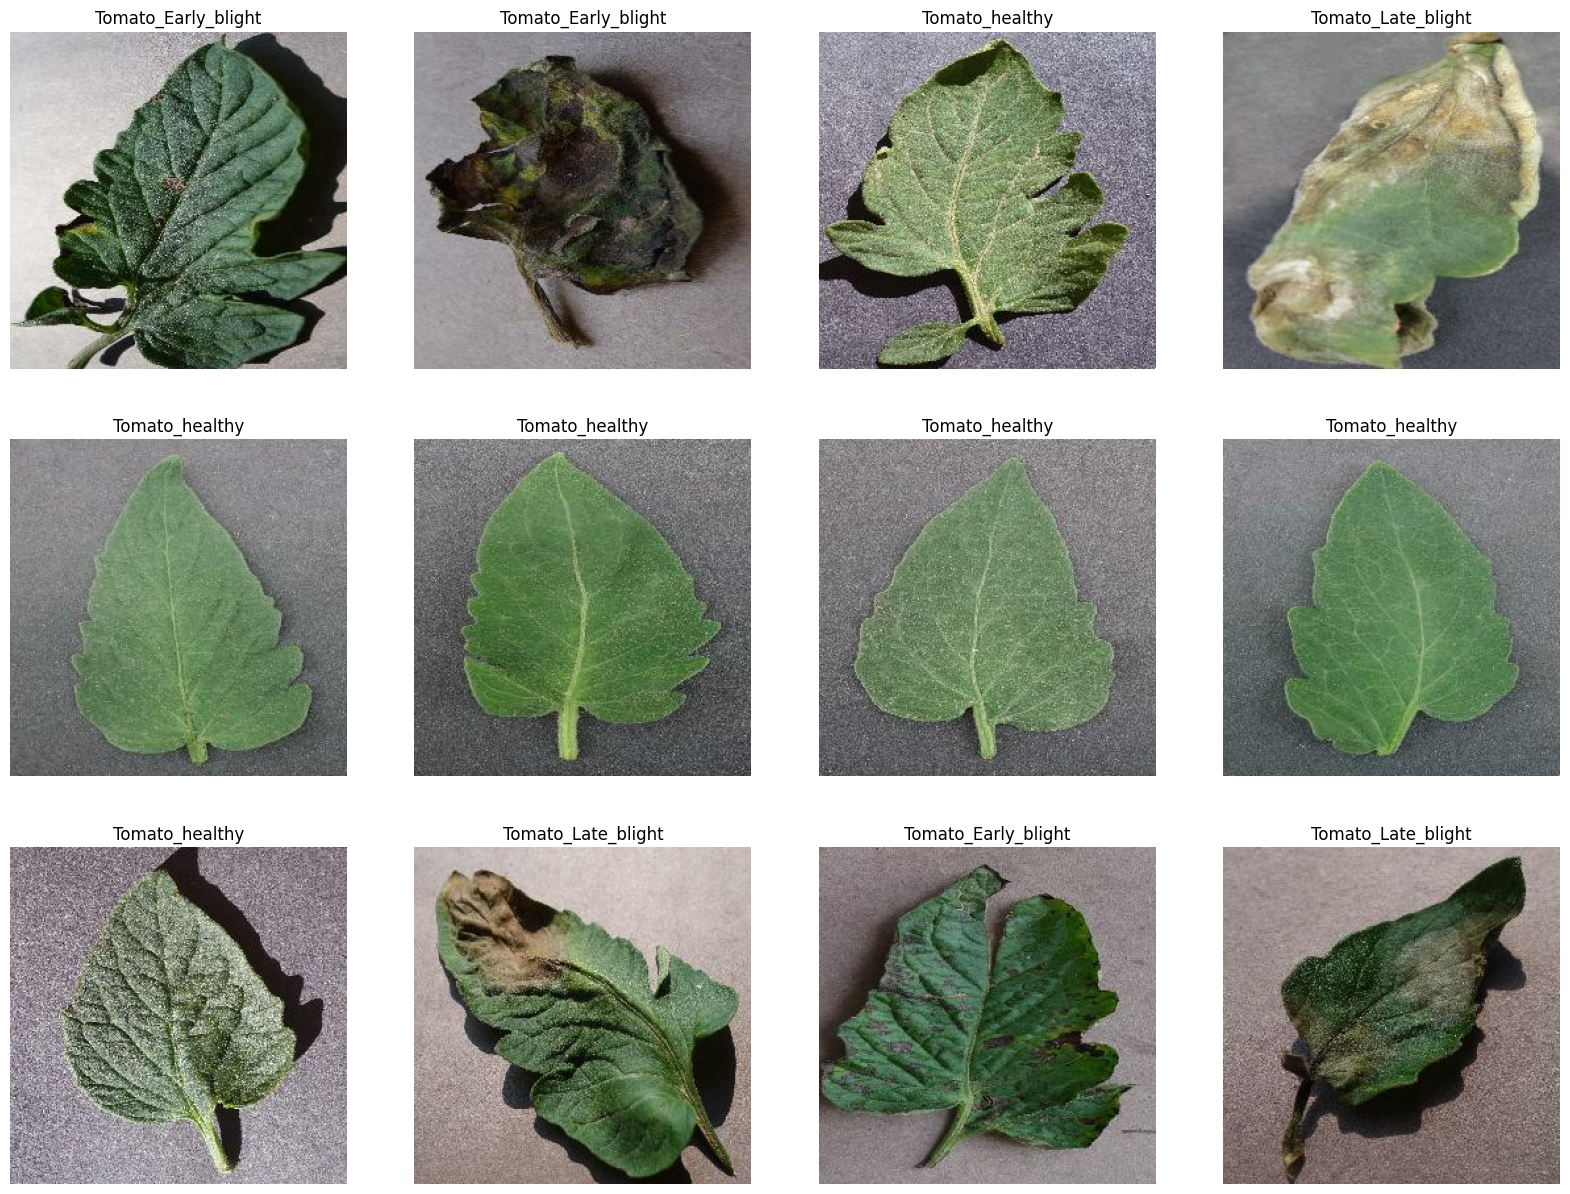

In [25]:
plt.figure(figsize=(20,15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(Class_names[labels_batch[i]])
        plt.axis("off")

## Function to Split Dataset
### Dataset should be bifurcated into 3 subsets, namely:

1- Training: Dataset to be used while training " 80% of Dataset "

2- Validation: Dataset to be tested against while training " 10% of Dataset "

3- Test: Dataset to be tested against after we trained a model " 10% of Dataset "

In [26]:
def get_dataset (ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [27]:
train_ds, val_ds, test_ds  = get_dataset(dataset)

In [28]:
print (" Size for train_ds :", len(train_ds))
print (" Size for val_ds :", len(val_ds))
print (" Size for test_ds :", len(test_ds))

 Size for train_ds : 112
 Size for val_ds : 14
 Size for test_ds : 15


## Cache, Shuffle, and Prefetch the Dataset

In [29]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

## Data Augmentation

In [30]:
data_Agumentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [31]:
rescale_resize = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1./255)
])

## Applying Data Augmentation to Train Dataset

In [32]:
train_ds = train_ds.map(lambda x, y: (data_Agumentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [33]:
model = models.Sequential([
    rescale_resize,
    layers.Conv2D(32 , kernel_size = (3,3) , activation = "relu" , input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense( 3, activation='softmax'),
])

model.build(input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS))

In [34]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile( optimizer= "adam" , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False) , metrics= ["accuracy"])

In [36]:
history = model.fit(train_ds , batch_size= BATCH_SIZE , validation_data= val_ds , epochs= EPOCHS , verbose= 1)

Epoch 1/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 77s 631ms/step - accuracy: 0.4683 - loss: 0.9889 - val_accuracy: 0.7500 - val_loss: 0.5424
Epoch 2/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 69s 609ms/step - accuracy: 0.7837 - loss: 0.4785 - val_accuracy: 0.8214 - val_loss: 0.4279
Epoch 3/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 68s 606ms/step - accuracy: 0.8481 - loss: 0.3599 - val_accuracy: 0.8795 - val_loss: 0.2686
Epoch 4/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 68s 608ms/step - accuracy: 0.8558 - loss: 0.3385 - val_accuracy: 0.8549 - val_loss: 0.3319
Epoch 5/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 69s 615ms/step - accuracy: 0.8617 - loss: 0.3349 - val_accuracy: 0.7054 - val_loss: 0.7410
Epoch 6/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 67s 598ms/step - accuracy: 0.8665 - loss: 0.3055 - val_accuracy: 0.9219 - val_loss: 0.2282
Epoch 7/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 68s 602ms/step - accuracy: 0.8795 - loss: 0.3054 - val_accuracy: 0.8973 - val_loss: 0.2783
Epoch 8/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 67s 595ms/step - accuracy: 0.8553 - loss: 0

In [41]:
score = model.evaluate(test_ds)

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.9574 - loss: 0.1230


In [42]:
score

[0.10201342403888702, 0.9666666388511658]

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

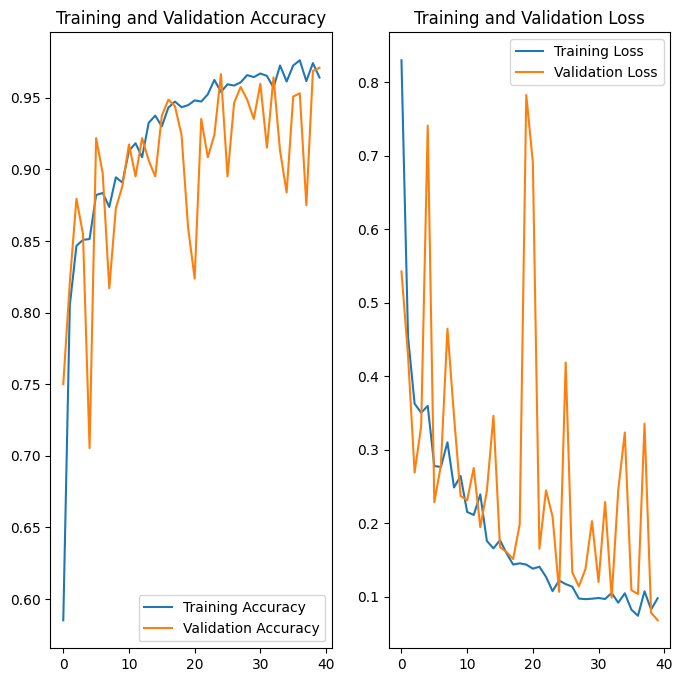

In [45]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Tomato_Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
predicted label: Tomato_Early_blight


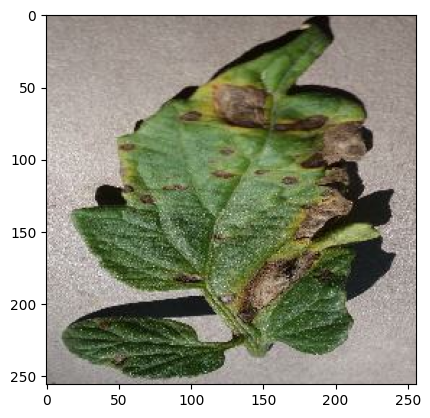

In [47]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",Class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",Class_names[np.argmax(batch_prediction[0])])

In [48]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = Class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


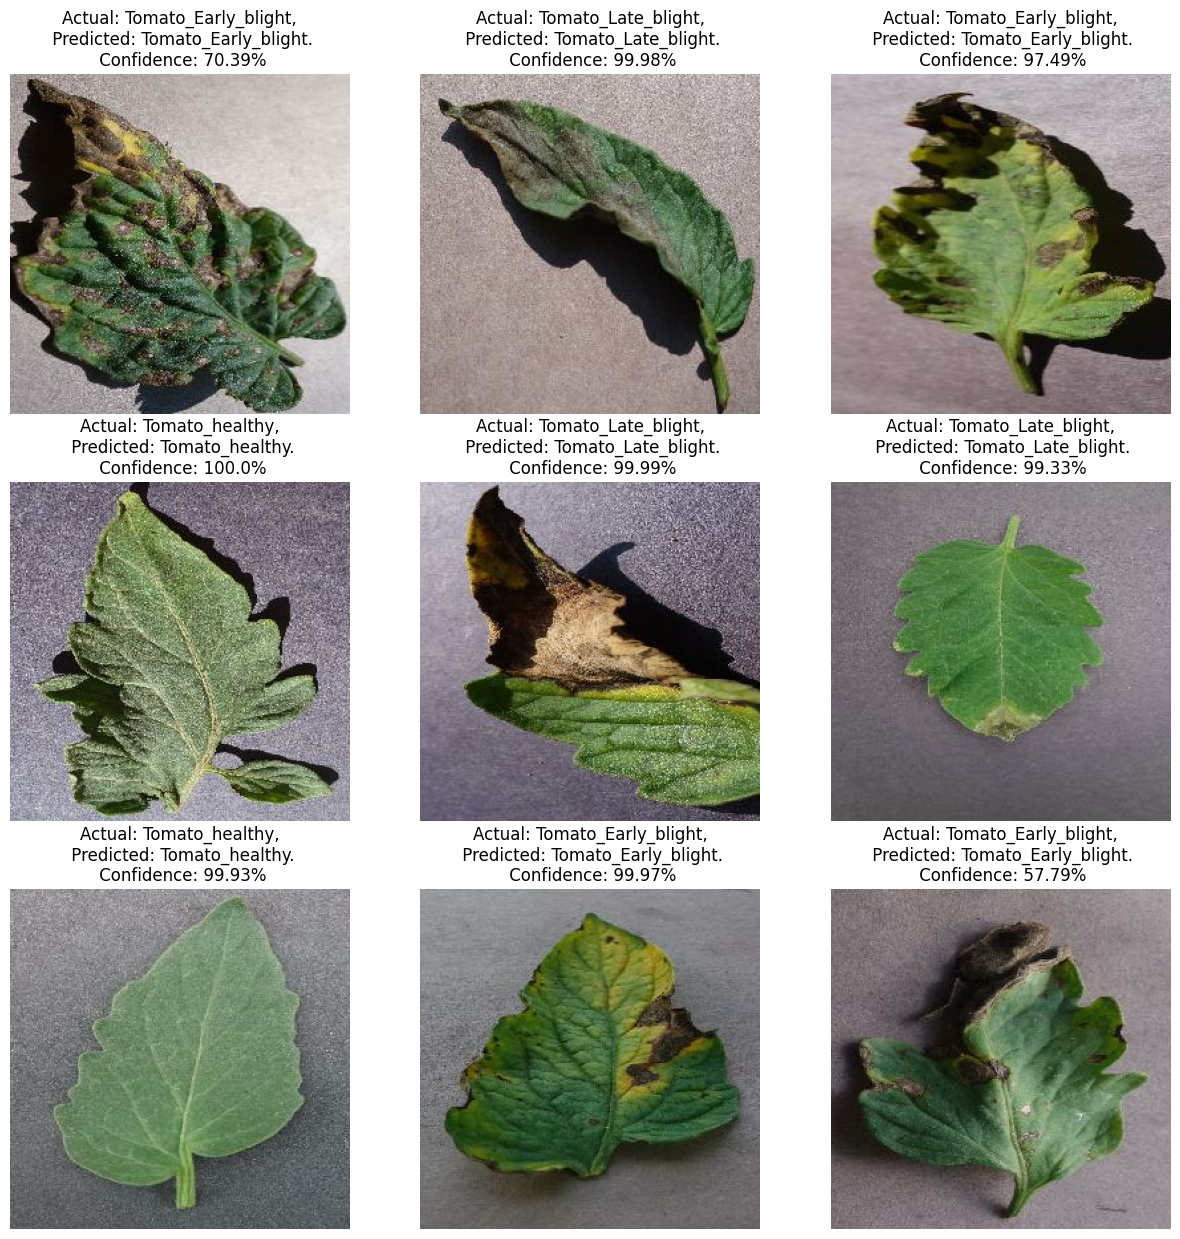

In [49]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = Class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [60]:
import os

# Define the directory path where the model will be saved
save_dir = "G:/Potata Disease_project/FastApi_Application/models"

# Ensure the directory exists
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Find the highest version number in the directory and increment it by 1
model_version = max([int(i) for i in os.listdir(save_dir) if i.isdigit()] + [0]) + 1

# Save the model with the new version number
model.save("G:/Potata Disease_project/FastApi_Application/Tomato_Disease.h5")

In [61]:
import os

# Define the directory path where the model will be saved
save_dir = "G:/Potata Disease_project/FastApi_Application/models"

# Ensure the directory exists
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Find the highest version number in the directory and increment it by 1
model_version = max([int(i) for i in os.listdir(save_dir) if i.isdigit()] + [0]) + 1

# Save the model with the new version number and .h5 extension
model.save(f"{save_dir}/{model_version}.h5")
